<h1>PyTorch Neural Net to train Car</h1>

This notebook is the start of project 2, using the example of PyTorch tutorials from PyTorch.org. 

In this notebook we switch to the use of a DataLoader and to the use of <strong>ML Flow</strong>.

In [1]:
import pandas as pd
import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

import mlflow
# import mlflow.pytorch 
# import pytorch_lightning as pl

import matplotlib.pyplot as plt

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [17]:
# import data in pandas
# df_train = pd.read_csv('../simpylc/sonar_1.samples', delim_whitespace=True,
#                  header=None, index_col=False)

data_samples = 'Lidar5000.samples'
df_train = pd.read_csv(data_samples, delim_whitespace=True,
                 header=None, index_col=False)

In [18]:
# check data type -> float, not object
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5000 non-null   float64
 1   1       5000 non-null   float64
 2   2       5000 non-null   float64
 3   3       5000 non-null   float64
 4   4       5000 non-null   float64
 5   5       5000 non-null   float64
 6   6       5000 non-null   float64
 7   7       5000 non-null   float64
 8   8       5000 non-null   float64
 9   9       5000 non-null   float64
 10  10      5000 non-null   float64
 11  11      5000 non-null   float64
 12  12      5000 non-null   float64
 13  13      5000 non-null   float64
 14  14      5000 non-null   float64
 15  15      5000 non-null   float64
 16  16      5000 non-null   float64
dtypes: float64(17)
memory usage: 664.2 KB


In [19]:
# check seperator -> 4 columns present?
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,7.4323,6.8392,8.3790,10.2530,12.9241,11.2324,5.7372,5.8695,20.0,20.0,5.2415,2.7460,4.2973,5.5127,1.4397,6.4269,-32.0
1,7.4322,6.8391,8.3789,10.2529,12.9240,11.2323,5.7371,5.8694,20.0,20.0,5.2415,2.7460,4.2972,5.5126,1.4396,6.4268,-32.0
2,7.4313,6.8382,8.3781,10.2522,12.9234,11.2318,5.7366,5.8691,20.0,20.0,5.2407,2.7451,4.2963,5.5117,1.4386,6.4259,-32.0
3,7.4296,6.8366,8.3767,10.2508,12.9222,11.2308,5.7358,5.8685,20.0,20.0,5.2392,2.7435,4.2947,5.5099,1.4368,6.4241,-32.0
4,7.4271,6.8342,8.3745,10.2488,12.9204,11.2294,5.7345,5.8676,20.0,20.0,5.2371,2.7412,4.2923,5.5074,1.4343,6.4215,-32.0


In [20]:
df_trainX = df_train.iloc[:,0:16]
df_trainX.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,7.4323,6.8392,8.3790,10.2530,12.9241,11.2324,5.7372,5.8695,20.0,20.0,5.2415,2.7460,4.2973,5.5127,1.4397,6.4269
1,7.4322,6.8391,8.3789,10.2529,12.9240,11.2323,5.7371,5.8694,20.0,20.0,5.2415,2.7460,4.2972,5.5126,1.4396,6.4268
2,7.4313,6.8382,8.3781,10.2522,12.9234,11.2318,5.7366,5.8691,20.0,20.0,5.2407,2.7451,4.2963,5.5117,1.4386,6.4259
3,7.4296,6.8366,8.3767,10.2508,12.9222,11.2308,5.7358,5.8685,20.0,20.0,5.2392,2.7435,4.2947,5.5099,1.4368,6.4241
4,7.4271,6.8342,8.3745,10.2488,12.9204,11.2294,5.7345,5.8676,20.0,20.0,5.2371,2.7412,4.2923,5.5074,1.4343,6.4215


In [21]:
df_trainY = df_train.iloc[:,-1]
df_trainY.head()

0   -32.0
1   -32.0
2   -32.0
3   -32.0
4   -32.0
Name: 16, dtype: float64

In [22]:
trainingSetX = torch.tensor(df_trainX.values, dtype = torch.float32)
trainingSetY = torch.tensor(df_trainY.values, dtype = torch.float32)

In [23]:
print(trainingSetX.shape)
print(trainingSetY.shape)

torch.Size([5000, 16])
torch.Size([5000])


In [43]:
class AutoBrain(nn.Module):
    
    #def __init__(self, inputs, outputs):
    def __init__(self):
        
        super().__init__()
        
        # Advanced linear connections
        # self.inOut = nn.Linear(inputs, outputs)
        # self.inOut = nn.Linear(3,1)
        self.inOut = nn.Sequential(
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.SiLU(),
            # nn.ReLU(),
            nn.Linear(64, 1)
        )
        # nn.BatchNorm1d(64)
            
    def forward(self, x):
        
        # return self.sigmoid(self.inOut(x))
        # return self.tanh(self.inOut(x))
        return self.inOut(x)
        # pass
        

In [46]:


epochCount = 0
epochLoss = []

# Variables for experiment matrix and ml flow
sensor = 'Lidar'
# hidden_layers defined by output: 64_16_ means lidar = 16 inputs, 2 hidden layers with outputs 64 and 16. Output of last layers is always 1.
hidden_layers = '64_64_64_'
activation = 'ReLU_ReLU_SiLU'

epochs = 400
lr = 0.0001
batch_size = 64

# create DataLoader, then take one batch
# from batch_size=16 to 2500 (entire dataset), normally 50-256
loader = DataLoader(list(zip(trainingSetX,trainingSetY)), shuffle=False, batch_size=batch_size)
for x_batch, y_batch in loader:
    # print(x_batch, y_batch)
    break

model = AutoBrain()

loss_fn = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=lr) 
optimizer = optim.Adagrad(model.parameters(), lr=lr)


# Train the model
for epoch in range(epochs):
        losses = 0

        for x_batch, y_batch in loader:
            y_hat = model(x_batch)
            loss = loss_fn(y_hat, y_batch)
            # print(y_hat-y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # print(loss.item())
            epochCount += 1
            losses += (loss.item())

        epochLoss.append((losses)/len(loader))
        # print(losses)
        


# dit werkt alleen met PyTorch Lightning:
# mlflow.pytorch.autolog()

# register experiments in mlflow

mlflow.set_experiment('AutoBrain')

# with mlflow.start_run(run_name=f'Neural net ({sensor}) | layers: {len(hidden_layers)}, epochs: {epochs}, lr: {lr}, batchsize: {batch_size}'):
with mlflow.start_run(run_name=f'NN({sensor}) {hidden_layers}, epochs: {epochs}, lr: {lr}, batchsize: {batch_size}'):


    mlflow.log_param('sensor', sensor)
    mlflow.log_param('data_samples', data_samples)
    
    mlflow.log_param('hidden_layers', hidden_layers)
    mlflow.log_param('activation', activation)

    mlflow.log_param('epochs', epochs)
    mlflow.log_param('lr', lr)
    mlflow.log_param('batch_size', batch_size)

    mlflow.log_param('optimizer', optimizer)
    mlflow.log_param('loss_fn', loss_fn)
    mlflow.log_metric('epochLoss', epochLoss[-1])

    # mlflow.log_artifact(f"../models/{notebook_str}.pickle")

    # mlflow.log_artifact(f"../loss_graphs/{notebook_str}.png")

    

In [47]:
# mlflow.pytorch.autolog(log_every_n_epoch=1, log_every_n_step=None, log_models=True, disable=False, exclusive=False, disable_for_unsupported_versions=False, silent=False, registered_model_name=None)

print(epochLoss[-1])


177.74799308776855


In [14]:
# evaluate accuracy after training
# LET OP: accuracy wordt vooral bij classificatie gebruikt. Dit is regressie. Beter is te kijken naar de loss, gebaseerd op MSE of RMSE.

model.eval()
y_hat = model(trainingSetX)
acc = (y_hat.round() == trainingSetY).float().mean()
acc = float(acc)
print("Model accuracy: %.2f%%" % (acc*100))

Model accuracy: 0.00%


In [15]:
display(loss)

tensor(nan, grad_fn=<MseLossBackward0>)

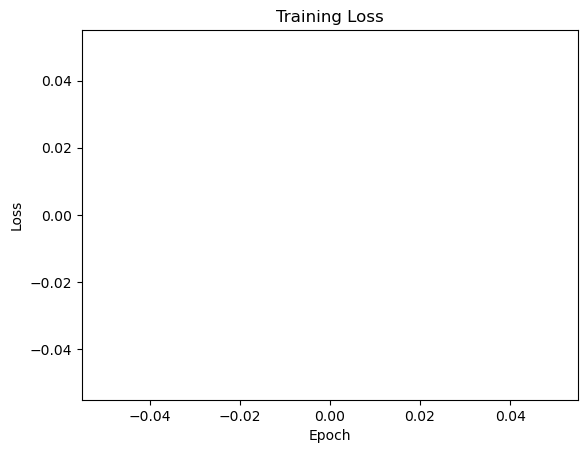

In [16]:
#----------------------------------------

fig, ax = plt.subplots()
ax.set(xlabel='Epoch', ylabel='Loss', title="Training Loss")

# plt.plot([x for x in range(epochs)], losses, 'red')
# plt.plot([x in], losses, 'red')
plt.plot(epochLoss, 'red')
plt.show()

#----------------------------------------

In [23]:
# Save trained model
# data/sonar_model_weights.pth heeft accuracy 57%
torch.save(model.inOut, 'data/lidar_model_1.pth')

In [130]:
import pickle

pickle.dump(model.inOut, open('data/sonar_model.pkl', 'wb'))


In [126]:
# To load trained model:
model = torch.load('data/sonar_model_weights_2.pth')
model.eval()

AutoBrain(
  (inOut): Sequential(
    (0): Linear(in_features=3, out_features=9, bias=True)
    (1): ReLU()
    (2): Linear(in_features=9, out_features=3, bias=True)
    (3): SiLU()
    (4): Linear(in_features=3, out_features=1, bias=True)
  )
)

In [127]:
pickled_model = pickle.load(open('data/sonar_model.pkl', 'rb'))

In [ ]:
pickled_model.eval()

AutoBrain(
  (inOut): Sequential(
    (0): Linear(in_features=3, out_features=9, bias=True)
    (1): ReLU()
    (2): Linear(in_features=9, out_features=3, bias=True)
    (3): SiLU()
    (4): Linear(in_features=3, out_features=1, bias=True)
  )
)

In [137]:
model(torch.tensor([0.9781, 1.1411, 2.2500]))

tensor([-7.7267], grad_fn=<AddBackward0>)